# **Final Project 4**


# **1. Perkenalan**

Nama Anggota Kelompok :
1. Muhammad Rafi Ramadhan / PYTN-KS12-002
2. Aurisha Lutvinda Putrian / PYTN-KS12-014
3. Carenina Amanda Putri / PYTN-KS12-017

## Latar Belakang

Dalam industri perbankan dan sektor keuangan, penggunaan kartu kredit sangat umum. Institusi keuangan seperti bank dan penyedia kartu kredit mengumpulkan sejumlah besar data tentang bagaimana pelanggan mereka menggunakan kartu kredit. Data ini mencakup informasi tentang transaksi, profil pelanggan, perilaku penggunaan kartu kredit, dan faktor-faktor lain yang relevan.

Dataset "CCData" adalah salah satu kumpulan data yang menyediakan akses ke informasi tersebut. Dataset ini berisi data historis tentang bagaimana sekelompok pelanggan (tanpa menyebutkan identitas mereka) menggunakan kartu kredit. Data tersebut mencakup atribut-atribut seperti batas kredit pelanggan, saldo kartu saat ini, tingkat pembayaran, riwayat pembayaran, usia, jenis kelamin, status perkawinan, pendapatan, dan atribut lainnya yang berhubungan dengan penggunaan kartu kredit.

Dengan kata lain, dataset ini berisi sekumpulan informasi yang menggambarkan bagaimana orang menggunakan kartu kredit mereka, termasuk berapa banyak mereka meminjam, berapa saldo yang harus mereka bayar, seberapa sering mereka membayar tepat waktu, dan atribut-atribut lainnya yang bisa mempengaruhi penggunaan kartu kredit. Dataset ini membantu para profesional di industri keuangan untuk mempelajari perilaku pelanggan dan mengambil keputusan yang lebih baik dalam hal pemasaran, manajemen risiko, dan pelayanan pelanggan.

## Objektif

Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan



# **2. Import Data**

Pada bagian ini menggunakan import library untuk melakukan preprocessing, visualisasi dan modelling

In [128]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objs as go
import seaborn as sns

from kneed import KneeLocator
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, normalize
from yellowbrick.cluster import KElbowVisualizer

# **3. Data Loading**


## Read Dataframe dari source CSV

Memasukkan dataframe, dataframe yang digunakan kali ini adalah dataframe **Weather AUS**, yang kemudian menampilkan data teratas

In [129]:
df = pd.read_csv('E:/Kuliah/Semester 6/Hacktiv8/Final Project/FP 4/CC GENERAL.csv')
pd.set_option('display.max_columns', None)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [130]:
print("Dataset berisi {} baris dan {} kolom (atribut)".format(df.shape[0], df.shape[1]))

Dataset berisi 8950 baris dan 18 kolom (atribut)


## Melihat informasi kolom, baris, dan data type

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Keterangan:

1.	**CUST_ID** - Identifikasi pemegang kartu kredit (Kategori)
2.	**BALANCE** - Jumlah saldo yang tersisa dalam akun untuk melakukan pembelian
3.	**BALANCEFREQUENCY** - Seberapa sering saldo diperbarui, skor antara 0 dan 1 (1 = diperbarui secara sering, 0 = tidak diperbarui secara sering)
4.	**PURCHASES** - Jumlah pembelian yang dilakukan dari akun
5.	**ONEOFFPURCHASES** - Jumlah pembelian maksimum dalam satu kali transaksi
6.	**INSTALLMENTSPURCHASES** - Jumlah pembelian yang dilakukan secara mencicil
7.	**CASHADVANCE** - Uang tunai yang diberikan oleh pengguna di muka
8.	**PURCHASESFREQUENCY** - Seberapa sering pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9.	**ONEOFFPURCHASESFREQUENCY** - Seberapa sering pembelian dilakukan dalam satu kali transaksi (1 = sering dibeli, 0 = tidak sering dibeli)
10.	**PURCHASESINSTALLMENTSFREQUENCY** - Seberapa sering pembelian dilakukan dalam bentuk mencicil (1 = sering dilakukan, 0 = tidak sering dilakukan)
11.	**CASHADVANCEFREQUENCY** - Seberapa sering uang tunai di muka dibayarkan
12.	**CASHADVANCETRX** - Jumlah transaksi yang dilakukan dengan "Cash in Advance"
13.	**PURCHASESTRX** - Jumlah transaksi pembelian yang dilakukan
14.	**CREDITLIMIT** - Batas Kredit Kartu untuk pengguna
15.	**PAYMENTS** - Jumlah pembayaran yang dilakukan oleh pengguna
16.	**MINIMUM_PAYMENTS** - Jumlah pembayaran minimum yang dilakukan oleh pengguna
17.	**PRCFULLPAYMENT** - Persentase pembayaran penuh yang dilakukan oleh pengguna
18.	**TENURE** - Masa layanan kartu kredit untuk pengguna

## Melihat banyaknya unique values untuk tiap atribut.

In [132]:
for col in df.columns:
    print(col,': ', df[col].nunique())

CUST_ID :  8950
BALANCE :  8871
BALANCE_FREQUENCY :  43
PURCHASES :  6203
ONEOFF_PURCHASES :  4014
INSTALLMENTS_PURCHASES :  4452
CASH_ADVANCE :  4323
PURCHASES_FREQUENCY :  47
ONEOFF_PURCHASES_FREQUENCY :  47
PURCHASES_INSTALLMENTS_FREQUENCY :  47
CASH_ADVANCE_FREQUENCY :  54
CASH_ADVANCE_TRX :  65
PURCHASES_TRX :  173
CREDIT_LIMIT :  205
PAYMENTS :  8711
MINIMUM_PAYMENTS :  8636
PRC_FULL_PAYMENT :  47
TENURE :  7


# 4. Data Cleaning

In [133]:
# Menghapus kolom CUST_ID karna tidak memberikan informasi yang berarti untuk model
df.drop('CUST_ID', axis=1, inplace=True)

## Mengecek apakah terdapat duplikat value pada dataset

In [134]:
df.duplicated().sum()

0

## Missing Value

In [135]:
miss_df1 = pd.DataFrame({"Missing Value":df.isna().sum(), "Persentase":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
miss_df1

,Missing Value,Persentase
BALANCE,0,0.0 %
BALANCE_FREQUENCY,0,0.0 %
PURCHASES,0,0.0 %
ONEOFF_PURCHASES,0,0.0 %
INSTALLMENTS_PURCHASES,0,0.0 %
CASH_ADVANCE,0,0.0 %
PURCHASES_FREQUENCY,0,0.0 %
ONEOFF_PURCHASES_FREQUENCY,0,0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0 %
CASH_ADVANCE_FREQUENCY,0,0.0 %


In [136]:
df.isin(['unknown']).sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

In [137]:
# Mengisi null values
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [138]:
miss_df2 = pd.DataFrame({"Missing Value":df.isna().sum(), "Persentase":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
miss_df2

,Missing Value,Persentase
BALANCE,0,0.0 %
BALANCE_FREQUENCY,0,0.0 %
PURCHASES,0,0.0 %
ONEOFF_PURCHASES,0,0.0 %
INSTALLMENTS_PURCHASES,0,0.0 %
CASH_ADVANCE,0,0.0 %
PURCHASES_FREQUENCY,0,0.0 %
ONEOFF_PURCHASES_FREQUENCY,0,0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0 %
CASH_ADVANCE_FREQUENCY,0,0.0 %


Dari hasil pengecekan missing values diperoleh bahwa memang terdapat dua kolom yang memiliki missing value yaitu CREDIT_LIMIT dan CREDIT_LIMIT, namun missing value pada kedua kolom berikut telah diisi menggunakan nilai rata-rata dari masing masing kolom.

# **5. Explorasi Data Analysis**

In [139]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Query and Grouping

### Menampilkan data pemegang kartu kredit yang memiliki saldo (BALANCE) lebih dari 5000 dan Frekuensi belanja lebih dari 0.5

In [140]:
df['BALANCE'].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

In [141]:
# Menampilkan data pemegang kartu kredit yang memiliki saldo (BALANCE) lebih dari 5000 dan Frekuensi belanja lebih dari 0.5
query = df[(df['BALANCE'] > 6000) & (df['PURCHASES_FREQUENCY'] > 0.5)]
query

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
21,6369.531318,1.0,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.0,12
28,7152.864372,1.0,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.0,12
30,12136.219960,1.0,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.0,12
79,6593.820644,1.0,388.66,388.66,0.00,4621.934580,0.583333,0.583333,0.000000,0.416667,7,7,7000.0,1624.583114,2503.402340,0.0,12
86,7069.950386,1.0,1603.78,1445.14,158.64,5626.004046,1.000000,0.833333,1.000000,0.750000,23,23,11000.0,4589.873897,1876.262988,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,9321.555794,1.0,334.90,0.00,334.90,9463.245088,1.000000,0.000000,0.916667,0.083333,5,12,10000.0,2029.431421,3506.665810,0.0,12
7427,9220.534572,1.0,1420.31,777.66,642.65,9816.782544,1.000000,0.250000,1.000000,0.833333,29,77,12500.0,4257.372749,4696.075967,0.0,12
7513,6388.820712,1.0,5154.75,1622.06,3532.69,0.000000,1.000000,0.500000,1.000000,0.000000,0,115,9500.0,6436.518476,1823.789613,0.0,12
7596,7114.235621,1.0,1072.24,1000.00,72.24,2088.213086,0.666667,0.083333,0.583333,0.250000,7,9,10000.0,1837.750949,2449.812844,0.0,12


Berdasarkan hasil querring diatas diketahui bahwa customer relatif memiliki saldo banyak dan sering berbelanja justru berjumlah sedikit dari jumlah customer, berjumlah 177 customer dari 8949 total customer.

### Pengelompokkan Total Jumlah Transaksi Pembelian Berdasarkan Batas Kredit Kartu

In [142]:
purchase_transactions = df.groupby('TENURE')['PURCHASES_TRX'].sum()
print(purchase_transactions)

TENURE
6       1161
7       1077
8       1225
9       1150
10      1847
11      2868
12    122325
Name: PURCHASES_TRX, dtype: int64


Dari hasil analisis terhadap data pembelian berdasarkan masa layanan kartu kredit ('TENURE'), dapat dilihat bahwa masa layanan selama 12 bulan memiliki jumlah transaksi pembelian yang paling tinggi. Sementara itu, masa layanan 6 hingga 11 menunjukkan jumlah transaksi pembelian yang lebih rendah, tetapi masih signifikan. Analisis ini memberikan pemahaman tentang pola pembelian pelanggan berdasarkan masa layanan kartu kredit, yang dapat digunakan untuk mengidentifikasi tren pembelian dan mengambil keputusan bisnis yang lebih baik dalam meningkatkan layanan dan pengalaman pelanggan.

## Central Tendency

In [143]:
# MEAN
mean = df['BALANCE'].mean()
print("Rata-rata saldo costumer: ", mean)

# MEDIAN
median = df['BALANCE'].median()
print("Median dari saldo costumer: ", median)

# MODUS
modus = df['BALANCE'].mode().values[0]
print("Modus dari saldo customer: ", modus)

Rata-rata saldo costumer:  1564.4748276781038
Median dari saldo costumer:  873.385231
Modus dari saldo customer:  0.0


Dapat diketahui bahwa rata-rata saldo customer berjumlah 1564.47 dengan nilai tengah sebesar 873.38 dan 0.0 adalah nilai yang paling umum atau paling sering muncul dalam data saldo costumer.

## Variability

In [144]:
# Mencari variabilitas pada kolom 'CREDIT_LIMIT'
variance = np.var(df['CREDIT_LIMIT'])
std_dev = np.std(df['CREDIT_LIMIT'])
z = df['CREDIT_LIMIT']
z.skew()
percentile = np.percentile(z, [25, 50, 75])
jangkauan = np.ptp(z)

print("Variansi kolom CREDIT_LIMIT:  {:.4f}".format(variance))
print("Standar deviasi kolom CREDIT_LIMIT:  {:.4f}".format(std_dev))
print("Skewness:  {:.4f}".format(z.skew()))
print("Percentile: ", percentile)
print("Range: ", jangkauan)

Variansi kolom CREDIT_LIMIT:  13238021.0059
Standar deviasi kolom CREDIT_LIMIT:  3638.4091
Skewness:  1.5225
Percentile:  [1600. 3000. 6500.]
Range:  29950.0


Dari analisa variabilitas kolom 'CREDIT_LIMIT' pada dataset, Nilai rata-rata batas kredit adalah sekitar 1600 dengan standar deviasi sekitar 3638, menunjukkan variasi yang cukup besar. Distribusi data memiliki kemiringan ke kanan dengan skewness sebesar 1.5225. Persentil menunjukkan bahwa 25% pelanggan memiliki batas kredit di bawah 1600, 50% memiliki batas kredit di bawah 3000 (median), dan 75% memiliki batas kredit di bawah 6500. Rentang batas kredit yang diamati adalah sebesar 29950. 

## Visualisasi Sederhana

### Bar plot Distribusi Jumlah Pengguna Berdasarkan Tenure Layanan Kartu Kredit

In [145]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

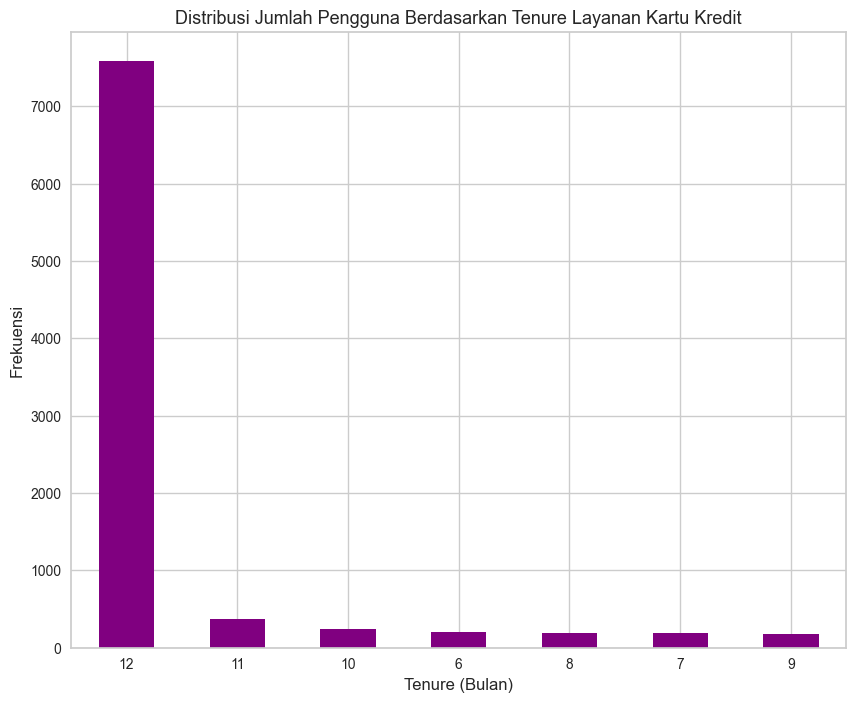

In [146]:
df['TENURE'].value_counts().plot.bar(color='Purple', figsize=(10,8))
plt.title('Distribusi Jumlah Pengguna Berdasarkan Tenure Layanan Kartu Kredit', fontsize=(13))
plt.xlabel("Tenure (Bulan)", fontsize= 12)
plt.ylabel("Frekuensi", fontsize= 12)
plt.xticks(rotation=0)
plt.show()


Berdasarkan hasil visualisasi, kita dapat melihat distribusi jumlah pengguna kartu kredit berdasarkan tenur layanan. Tenur 12 bulan memiliki jumlah pengguna yang paling banyak, dengan total 7584 pengguna, sedangkan tenur lainnya memiliki jumlah pengguna yang lebih rendah. Tenur 11 bulan, 10 bulan, 6 bulan, 8 bulan, 7 bulan, dan 9 bulan masing-masing memiliki jumlah pengguna sebanyak 365, 236, 204, 196, 190, dan 175. 

In [147]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

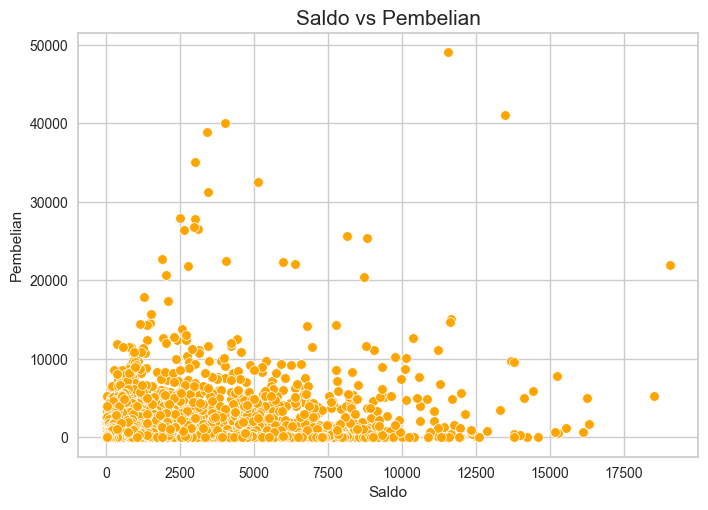

In [148]:
# Membuat Scatterplot
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df, color='orange')

# Mengatur label dan judul
plt.title("Saldo vs Pembelian", fontsize= 15)
plt.xlabel('Saldo')
plt.ylabel('Pembelian')

# Menampilkan plot
plt.show()

Dapat ditarik kesimpulan bahwa mayoritas pengguna kartu kredit memiliki saldo dalam kisaran 0 hingga 12500 dan melakukan pembelian dalam kisaran 0 hingga 10000. Namun, terdapat satu pengguna yang menonjol dengan pembelian tinggi sekitar 50000 meskipun memiliki saldo yang relatif rendah sekitar 12000. Temuan ini menunjukkan bahwa ada pengguna yang melakukan pembelian dalam jumlah yang signifikan meskipun memiliki saldo yang lebih rendah dibandingkan dengan pengguna lainnya.

### Korelasi Antar Variable

Membuat gambar (figure) dengan ukuran 18 x 12 inci menggunakan library matplotlib.pyplot (plt). Di dalam gambar tersebut, ditampilkan sebuah peta panas (heatmap) yang merepresentasikan korelasi antara variabel-variabel dalam dataframe.

<function matplotlib.pyplot.show(close=None, block=None)>

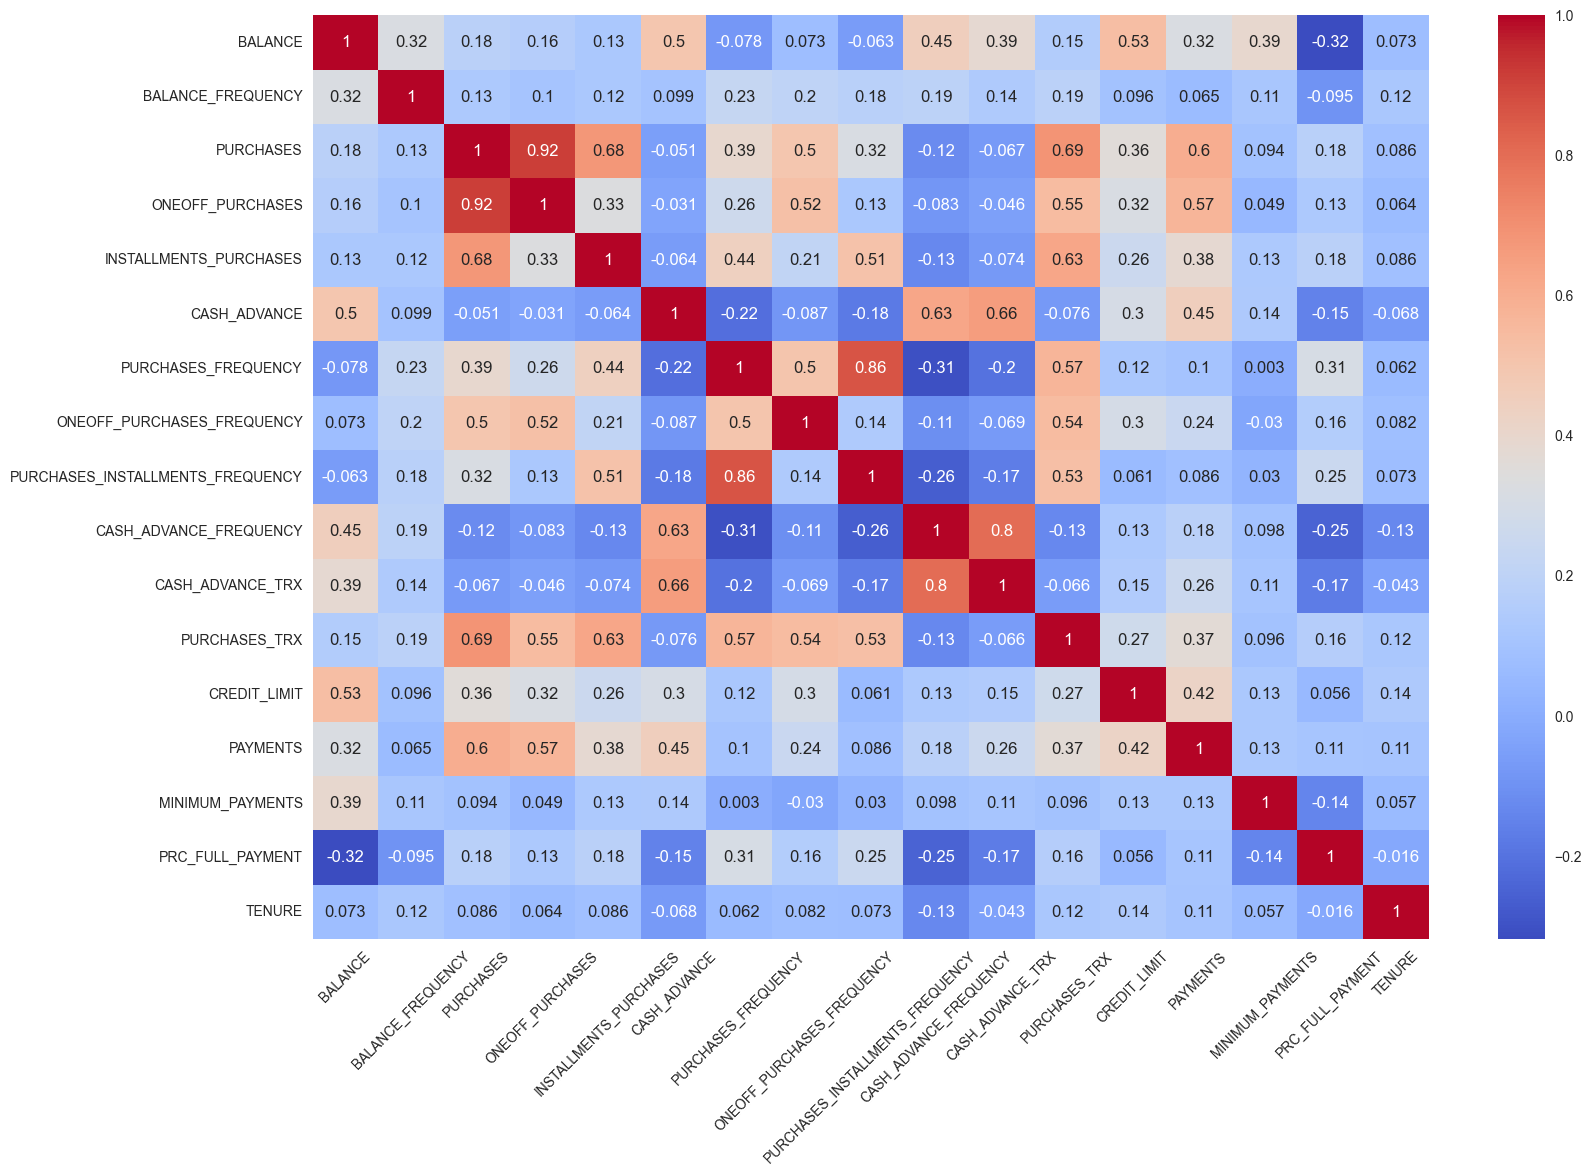

In [149]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.xticks(rotation=45)
plt.show

Berdasarkan heatmap diatas menunjukkan hubungan antara variabel-variabel dalam dataset. Dalam analisis ini, ditemukan bahwa saldo kartu kredit memiliki hubungan kuat dengan batas kredit dan jumlah pembayaran yang dilakukan oleh pengguna. Selain itu, pembelian satu kali (one-off purchases) memiliki hubungan erat dengan total pembelian, sedangkan pembelian dalam bentuk angsuran (installments purchases) memiliki hubungan yang signifikan dengan total pembelian. Penggunaan fasilitas penarikan tunai kartu kredit juga memiliki hubungan yang erat dengan frekuensi dan jumlah transaksi penarikan tunai. Analisis ini memberikan wawasan tentang pola-pola yang mungkin terjadi antara variabel-variabel tersebut dalam dataset.

# **6. Pre Processing**

In [150]:
df2=df.copy()
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Scaling Dataframe

In [151]:
a = [i for i in df2.columns]

scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2[a]), columns=a)
df2.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


StandardScaler adalah salah satu teknik penskalaan yang umum digunakan dalam pra pemrosesan data. Fitur utama dari StandardScaler adalah melakukan penskalaan data dengan mengurangi rata-rata dan membaginya dengan standar deviasi dari setiap fitur. Dengan demikian, setelah penskalaan, fitur-fitur akan memiliki rata-rata nol dan varians (standar deviasi) satu. StandardScaler berguna dalam metode berbasis jarak seperti K-Means Clustering, K-Nearest Neighbors, dan Algoritma Naive Bayes yang mengasumsikan bahwa data berdistribusi normal atau mendekati normal.

## PCA (Principal Component Analysis)

In [152]:
# Inisialisasi PCA dengan jumlah komponen utama yang sama dengan jumlah fitur
pca = PCA(n_components=df2.shape[1])

# Melakukan PCA pada dataset df2
pca.fit(df2)

# Menghitung jumlah komponen utama yang menjelaskan varians tertentu (misalnya 90%)
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(explained_variance_ratio_cumsum >= 0.9) + 1

print("Jumlah komponen utama yang menjelaskan 90% varians:", num_components)

Jumlah komponen utama yang menjelaskan 90% varians: 10


In [153]:
# PCA untuk dua Komponen Utama
pca = PCA(n_components=10)
X_pca = pca.fit_transform(df2)
X_pca

array([[-1.68222026e+00, -1.07645061e+00,  4.88506522e-01, ...,
        -3.93032122e-02,  1.15339545e-01, -7.77742533e-02],
       [-1.13829490e+00,  2.50647666e+00,  6.01212326e-01, ...,
         1.32410697e-01,  6.87877520e-01, -7.77670992e-01],
       [ 9.69684015e-01, -3.83520301e-01,  1.02371379e-01, ...,
        -1.69548386e-01, -8.83727488e-01, -1.93865634e-03],
       ...,
       [-9.26203638e-01, -1.81078560e+00, -4.74723055e-01, ...,
        -3.45934096e-01,  8.38189850e-01, -8.30004807e-01],
       [-2.33655167e+00, -6.57966015e-01,  9.74725121e-01, ...,
         1.48076612e-01,  1.25357253e+00,  2.68660267e-01],
       [-5.56422165e-01, -4.00467124e-01,  1.01519557e+00, ...,
        -3.76473295e-01, -8.22080374e-01,  3.45743919e-01]])

PCA (Principal Component Analysis) merupakan sebuah teknik statistik yang digunakan untuk mengurangi dimensi dari dataset yang kompleks, dengan tujuan mengidentifikasi pola dan struktur yang ada di dalamnya. PCA melakukan transformasi pada variabel-variabel yang saling terkorelasi tinggi menjadi komponen-komponen baru yang disebut "komponen utama". Dan atribut dataset dibagi menjadi 10 bagian komponen utama berdasarkan metode Explained Variance Ratio.

## Hierarchial Clustering Dengan Dendrogram

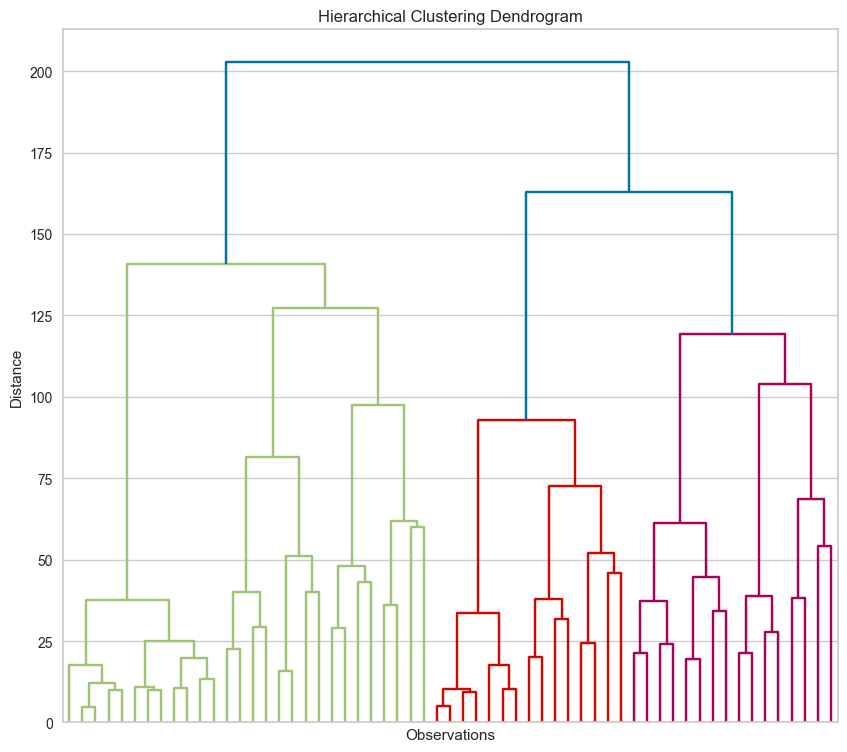

In [154]:
hier_cluster = linkage(X_pca, method='ward')

plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

Dalam kenyataannya, dendrogram adalah suatu struktur yang mengilustrasikan hubungan kesamaan antara data. Pada awalnya, setiap data ditempatkan pada level dasar di mana setiap data berdiri sendiri sebagai sebuah cluster tunggal. Kemudian, data-data yang saling dekat akan digabungkan menjadi satu cluster dan dihubungkan oleh suatu garis.

# **7.Data Modelling**

## KMeans

K-means merupakan salah satu algoritme clustering yang terkenal dan sederhana yang digunakan untuk mengelompokkan objek-objek data ke dalam kelompok atau klaster berdasarkan kesamaan atribut. Tujuan dari algoritme ini adalah untuk mengurangi variasi di dalam setiap klaster dan memaksimalkan variasi antara klaster.

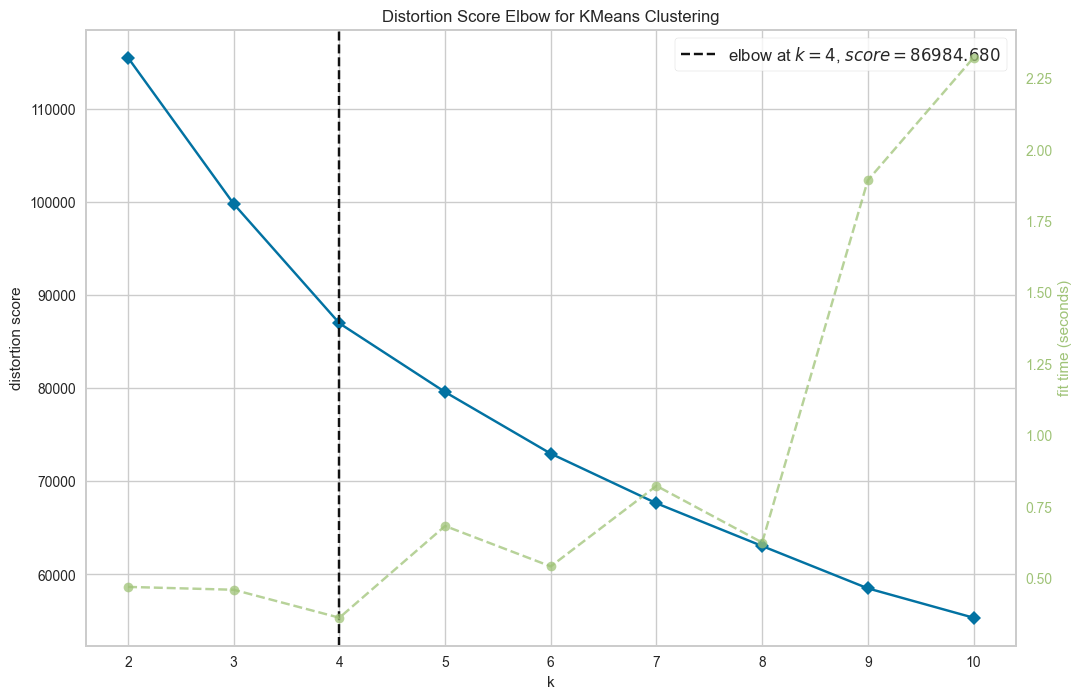

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [155]:
# KElbowVisualizar
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca)
elbow_graph.show()

Sebelum kita memulai mendefinisikan model KMeans ada baiknya kita melakukan KelbowVisualizer terlebih dahulu, yang merupakan sebuah fungsi yang digunakan untuk memvisualisasikan metode "elbow" dalam pemilihan jumlah cluster yang optimal dalam algoritme clustering, seperti K-means. Metode elbow digunakan untuk menentukan jumlah cluster yang paling tepat berdasarkan evaluasi inersia (inertia) atau nilai kekosongan (within-cluster sum of squares). Berdasarkan proses di atas, ditemukan bahwa jumlah cluster yang optimal adalah 4.

In [156]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=21)
kmeans.fit(X_pca)

KMeans(n_clusters=4, random_state=21)

In [157]:
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
df_kmeans = df2.copy()
df_kmeans['KMEANS_SEGMENT'] = labels
df_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_SEGMENT
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,2
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,1


C:\Users\Rafi\AppData\Local\Temp\ipykernel_12280\4248390380.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', num_clusters)


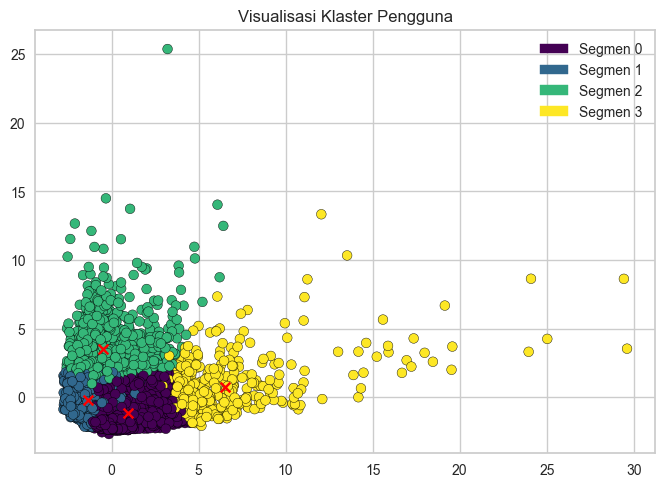

In [158]:
# Mendapatkan jumlah klaster
num_clusters = len(np.unique(labels))

# Menghasilkan colormap berdasarkan jumlah klaster
cmap = plt.cm.get_cmap('viridis', num_clusters)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=cmap, edgecolor='black')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red')

# Membuat legenda dengan nama klaster
legend_patches = []
for i in range(num_clusters):
    patch = mpatches.Patch(color=cmap(i), label='Segmen {}'.format(i))
    legend_patches.append(patch)

# Menampilkan legenda
plt.legend(handles=legend_patches)

plt.title('Visualisasi Klaster Pengguna')
plt.show()


Dapat kita lihat hasil visualisasi menggunakan KMeans clustering dengan jumlah segment ada 4 yang kemudian perlu kita ketahui terlebih dahulu masing masing segmen tersebut mewakili apa. Dengan pusat masing masing segment ditandai dengan tanda 'X' berwarna merah.

In [159]:
df_kmeans.groupby('KMEANS_SEGMENT').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMEANS_SEGMENT,,,,,,,,,,,,,,,,,
0,-0.320359,0.253715,0.109647,0.001018,0.257165,-0.366559,0.989682,0.323343,0.879580,-0.463016,-0.360580,0.304891,-0.079514,-0.138864,-0.091614,0.396975,0.058155
1,-0.263386,-0.373164,-0.340928,-0.229049,-0.385120,-0.185911,-0.789596,-0.389079,-0.706413,-0.102674,-0.165705,-0.473079,-0.331282,-0.263584,-0.117055,-0.257996,-0.051906
2,1.452273,0.384089,-0.235634,-0.165731,-0.252764,1.699292,-0.503002,-0.211056,-0.448895,1.745075,1.620153,-0.282291,0.840414,0.612230,0.485205,-0.404479,-0.099161
3,0.948092,0.463632,3.135365,2.720897,2.414930,-0.156517,1.133799,1.791824,1.058740,-0.319096,-0.171891,2.973840,1.437610,1.925693,0.475715,0.472118,0.324140


Dapat kita lihat bahwa segmen segmen yang dihasilkan memiliki ciri khas tersendiri yang merepresentasikan karakteristik pengguna, diantaranya:
1. Segmen 0 : Pengguna Level Rendah, karena memiliki ciri-ciri yang menunjukkan tingkat aktivitas atau nilai yang rendah dalam berbagai variabel, seperti saldo rendah, frekuensi pembaruan saldo yang jarang, pembelian yang rendah, pembelian maksimum dalam satu kali transaksi yang rendah, dan pembelian yang dilakukan secara mencicil yang rendah.
2. Segmen 1 : Pengguna Level Menengah, karena memiliki tingkat aktivitas atau nilai yang menengah dalam berbagai variabel. Meskipun tidak memiliki ciri-ciri yang sangat rendah atau tinggi, segmen ini menunjukkan pola yang relatif stabil dalam perilaku pengguna kartu kredit. 
3. Segmen 2 : Pengguna Level Tinggi, karena memiliki karakteristik yang menunjukkan tingkat aktivitas atau nilai yang tinggi dalam berbagai variabel. Segmen ini ditandai oleh saldo yang tinggi, frekuensi pembaruan saldo yang sering, jumlah pembelian yang tinggi, pembelian maksimum dalam satu kali transaksi yang tinggi, dan pembelian yang dilakukan secara mencicil yang tinggi.
4. Segmen 3 : Pengguna Level Sangat tinggi, karena memiliki karakteristik yang menunjukkan tingkat pembelian yang tinggi dalam berbagai variabel. Segmen ini ditandai oleh jumlah pembelian yang tinggi, pembelian maksimum dalam satu kali transaksi yang tinggi, pembelian yang dilakukan secara mencicil yang tinggi, dan frekuensi pembelian yang tinggi. Meskipun tidak memiliki saldo yang sangat tinggi, segmen ini menunjukkan pola pembelian yang aktif dan intens.


In [160]:
df_kmeans['LABELS'] = df_kmeans['KMEANS_SEGMENT'].map({0: "Pengguna Level Rendah",
                                                         1: "Pengguna Level Menengah",
                                                         2: "Pengguna Level Tinggi",
                                                         3: "Pengguna Level Sangat Tinggi"})
df_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_SEGMENT,LABELS
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680,1,Pengguna Level Menengah
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680,2,Pengguna Level Tinggi
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680,0,Pengguna Level Rendah
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.360680,1,Pengguna Level Menengah
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680,1,Pengguna Level Menengah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768,0,Pengguna Level Rendah
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-4.390474e-16,-0.525551,-4.122768,0,Pengguna Level Rendah
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768,0,Pengguna Level Rendah
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768,1,Pengguna Level Menengah


In [161]:
# Mengetahui komposisi pengguna berdasarkan klaster
print("Komposisi Pengguna Kartu Kredit:")
print(df_kmeans['LABELS'].value_counts())


Komposisi Pengguna Kartu Kredit:
Pengguna Level Menengah         4008
Pengguna Level Rendah           3337
Pengguna Level Tinggi           1196
Pengguna Level Sangat Tinggi     409
Name: LABELS, dtype: int64


Dari hasil perhitungan diatas, bisa kita lihat bahwa mayoritas dari pengguna adalah Pengguna Level Menengah sebanyak 4008 pengguna yang diikuti oleh Pengguna Level Rendah sebanyak 3337 pengguna dan Pengguna Level Sangat Tinggi yang hanya memilki 409 pengguna.   

In [174]:
# Menghitung metrik-metrik evaluasi
Inertia = round(kmeans.inertia_, 4)
silhouette_avg_kmeans = round(silhouette_score(X_pca, labels), 4)
davies_bouldin_kmeans = round(davies_bouldin_score(X_pca, labels), 4)
calinski_harabasz_kmeans = round(calinski_harabasz_score(X_pca, labels), 4)

test_kmeans = pd.DataFrame({'KMeans': [inertia, silhouette_avg_kmeans,
                                       davies_bouldin_kmeans,
                                       calinski_harabasz_kmeans]},
index=['Inertia', 'Silhouette Score', 'Davies-Bouldin', 'Calinski-Harabasz'])
test_kmeans

,KMeans
Inertia,86984.7363
Silhouette Score,0.2170
Davies-Bouldin,1.4796
Calinski-Harabasz,1813.0874


Dalam hasil keluaran di atas, nilai inertia sebesar 86984.7363 mengindikasikan bahwa titik-titik data dalam kelompok memiliki variasi yang cukup besar. Hal ini menunjukkan adanya variasi yang signifikan antara titik-titik data dalam kelompok tersebut. Skor silhouette sebesar 0.2170 menunjukkan bahwa konfigurasi klaster yang dihasilkan memiliki tingkat pemisahan yang cukup baik. Namun, skor silhouette yang relatif rendah mengindikasikan bahwa beberapa contoh mungkin mengalami kesulitan dalam membedakan kelompok mereka dengan kelompok tetangga terdekat. Nilai Davies-Bouldin sebesar 1.4796 digunakan untuk mengevaluasi kualitas klastering dengan mengukur pemisahan antara klaster. Semakin rendah nilai Davies-Bouldin, semakin baik pemisahan antara klaster. Dalam kasus ini, konfigurasi klaster yang dihasilkan menunjukkan pemisahan yang cukup baik, seiring dengan nilai Davies-Bouldin yang relatif rendah.  Calinski-Harabasz score mengukur kualitas pemisahan klaster berdasarkan jarak antar klaster dan jarak dalam klaster. Semakin tinggi nilai Calinski-Harabasz, semakin baik pemisahan klaster yang dilakukan oleh model. Nilai 994.8927 menunjukkan adanya pemisahan klaster yang baik pada model KMeans.

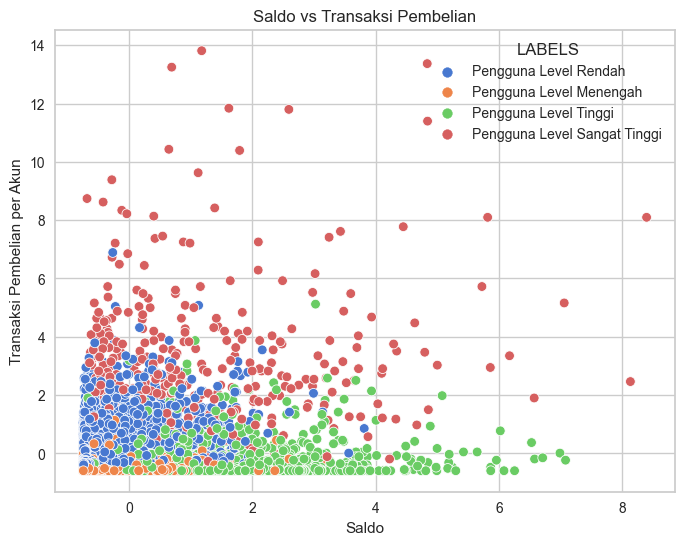

<Figure size 800x550 with 0 Axes>

In [163]:
# Visualisasi hubungan antar salah satu atribut pada model KMeans
plt.figure(figsize=(8,6))
X = df_kmeans['BALANCE']
Y = df_kmeans['PURCHASES_TRX']
g = sns.scatterplot(x=X, y=Y, 
                    hue=df_kmeans['LABELS'], 
                    palette='muted',
                    alpha=1,
                    hue_order=["Pengguna Level Rendah", "Pengguna Level Menengah", "Pengguna Level Tinggi", "Pengguna Level Sangat Tinggi"])
g.set_xlabel('Saldo')
g.set_ylabel('Transaksi Pembelian per Akun')
g.set_title('Saldo vs Transaksi Pembelian')
plt.show()

plt.savefig("Transaksi Pembelian vs Pembelian KMeans.png",
            bbox_inches="tight",
            pad_inches=1,
            transparent=True,
            orientation='landscape')


Dari grafik terlihat dari 4 cluster, cluster yang menonjol baik dari segi saldo maupun jumlah transaksi adalah Pengguna Level Sangat tinggi. Diikuti Pengguna Level Tinggi yang memiliki banyak saldo namun jumlah transaksi tidak terlalu banyak untuk masing masing akun. Kemudian ada Pengguna Level Rendah dan menengah yang sama sama memiliki saldo yang lebih rendah dibanding Pengguna Level Tinggi dan Sangat Tinggi, namun pada jumlah transaksi Pengguna Level Rendah memiliki jumlah transaksi yang lebih banyak. 

## DBScan Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) merupakan salah satu algoritme clustering yang berguna dalam mengelompokkan objek-objek dalam data berdasarkan kepadatan atau kerapatan spasial. Dengan menggunakan DBSCAN, kita dapat mengidentifikasi klaster berdasarkan kedekatan objek-objek yang memiliki kerapatan yang tinggi, sementara juga membedakan objek-objek yang berada pada area yang jarang atau mengandung noise. Kelebihan dari algoritme ini adalah tidak memerlukan jumlah klaster sebagai parameter masukan, sehingga cocok untuk mengatasi data dengan bentuk dan ukuran klaster yang bervariasi.

Text(0, 0.5, 'Distance')

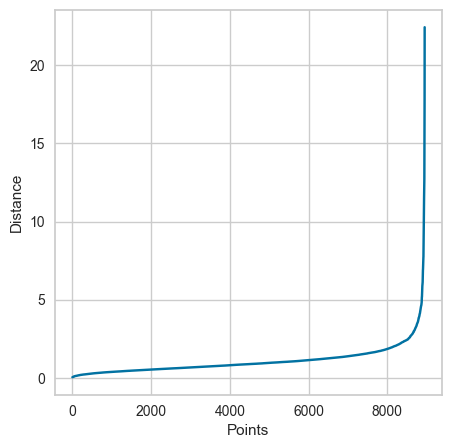

In [164]:
# mencari nilai epsilon untuk klasterisasi menggunakan DBScan
nearest_neighbors = NearestNeighbors(n_neighbors=19)
neighbors = nearest_neighbors.fit(X_pca)

distances, indices = neighbors.kneighbors(X_pca)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

1.8341


<Figure size 500x500 with 0 Axes>

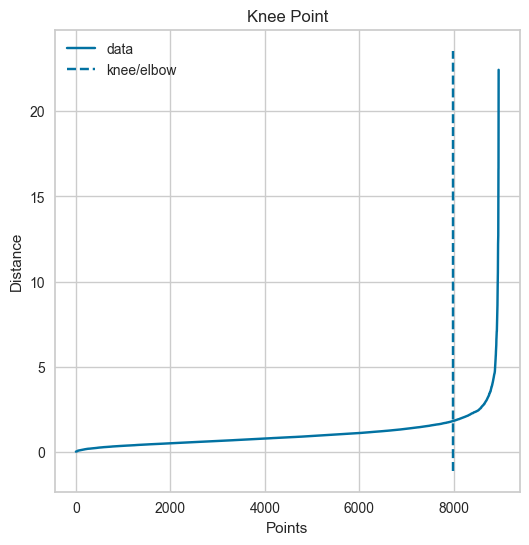

In [165]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(round(distances[knee.knee], 4))

Setelah menggunakan metode elbow dan diperjelas dengan knee locator dapat kita ketahui bahwa nilai epsilon yang pas untuk data ini adalah sebesar 1.8431.

In [166]:
# Menginisialisasi algoritma clustering DBSCAN
dbscan = DBSCAN(eps=1.8341, min_samples=9)

# Melakukan fitting model DBSCAN pada data yang telah di-scale
dbscan.fit(X_pca)

# Mendapatkan label klaster (-1 merepresentasikan outlier)
dbscan_labels = dbscan.labels_
df_dbscan = df2.copy()
df_dbscan['DBSCAN_SEGMENT'] = dbscan.labels_
df_dbscan.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,DBSCAN_SEGMENT
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,0


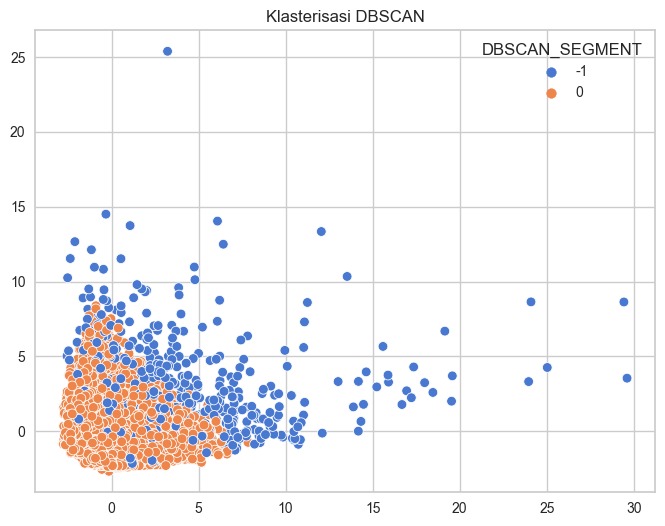

In [175]:
# Visualisasi hasil klasterisasi DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_dbscan['DBSCAN_SEGMENT'], palette='muted', alpha=1)
plt.title('Klasterisasi DBSCAN')
plt.show()

In [168]:
df_dbscan.groupby('DBSCAN_SEGMENT').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
DBSCAN_SEGMENT,,,,,,,,,,,,,,,,,
-1,1.302673,0.171803,1.846692,1.577432,1.468736,1.297119,0.542426,0.82047,0.445844,0.832724,1.184577,1.528156,1.354085,2.147064,1.267418,0.220098,-0.302265
0,-0.080847,-0.010662,-0.114610,-0.097899,-0.091153,-0.080502,-0.033664,-0.05092,-0.027670,-0.051681,-0.073518,-0.094841,-0.084038,-0.133252,-0.078659,-0.013660,0.018759



Dapat kita lihat bahwa segmen segmen yang dihasilkan memiliki ciri khas tersendiri yang merepresentasikan karakteristik pengguna, diantaranya:
1. Segmen -1 : Pengguna Aktif, Karena memiliki nilai rata-rata yang lebih tinggi untuk atribut seperti frekuensi pembelian (PURCHASE_FREQUENCY), frekuensi pembelian secara tunai (CASH_ADVANCE_FREQUENCY), dan jumlah transaksi pembelian (PURCHASES_TRX).
2. Segmen 0:  Pengguna Pasif, karena memiliki nilai atribut yang cenderung rendah atau negatif pada sebagian besar variabel, seperti saldo (BALANCE), frekuensi pembelian (PURCHASES_FREQUENCY), dan batas kredit (CREDIT_LIMIT). Hal ini menunjukkan bahwa pelanggan dalam kelompok ini adalah pengguna dengan tingkat penggunaan kartu kredit yang rendah atau kurang aktif.

In [169]:
df_dbscan['LABELS'] = df_dbscan['DBSCAN_SEGMENT'].map({-1: "Pengguna Aktif",
                                                         0 : "Pengguna Pasif"})

In [170]:
# Mengetahui komposisi pengguna berdasarkan klaster
print("Komposisi Pengguna Kartu Kredit:")
print(df_dbscan['LABELS'].value_counts())

Komposisi Pengguna Kartu Kredit:
Pengguna Pasif    8427
Pengguna Aktif     523
Name: LABELS, dtype: int64


Dari hasil perhitungan diatas, bisa kita lihat bahwa mayoritas dari pengguna adalah Pengguna Pasif dengan jumlah 8427 orang yang diikuti oleh jumlah pengguna aktif sejumlah 523 orang. Hal ini mungkin mengindikasikan bahwa sebagian besar pemegang kartu kredit cenderung tidak aktif dalam melakukan transaksi atau pembelian menggunakan kartu kredit. 

In [173]:
# Menghitung metrik-metrik evaluasi
silhouette_avg_dbscan = round(silhouette_score(X_pca, dbscan_labels), 4)
davies_bouldin_dbscan = round(davies_bouldin_score(X_pca, dbscan_labels), 4)
calinski_harabasz_dbscan = round(calinski_harabasz_score(X_pca, dbscan_labels), 4)

test_dbscan = pd.DataFrame({'DBSCAN': [silhouette_avg_dbscan, davies_bouldin_dbscan, calinski_harabasz_dbscan]},
                           index = ['Silhouette Score', 'Davies-Bouldin', 'Calinski-Harabasz'])
test_dbscan


,DBSCAN
Silhouette Score,0.5030
Davies-Bouldin,1.9532
Calinski-Harabasz,994.8927



Hasil evaluasi DBSCAN menunjukkan kualitas klasterisasi yang baik. Silhouette Score memiliki nilai 0.5030, menunjukkan bahwa sebagian besar sampel berada dalam klaster yang sesuai. Davies-Bouldin Score memiliki nilai 1.9532, menunjukkan adanya jarak yang cukup jauh antara klaster, menandakan pemisahan yang baik. Pada Calinski-Harabasz, Nilai yang lebih tinggi menunjukkan klasterisasi yang lebih baik. Dalam hal ini, nilai 994.8927 menunjukkan adanya pemisahan yang baik antara klaster dalam model DBSCAN.

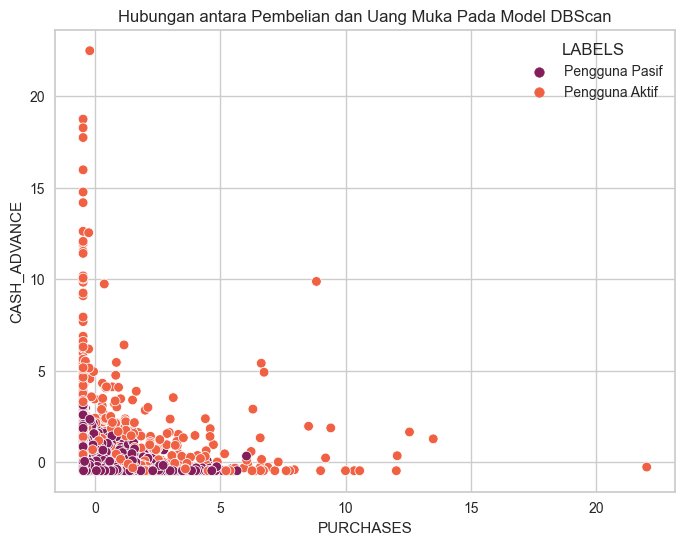

In [172]:
# Visualisasi hubungan antar salah satu atribut pada model KMeans
plt.figure(figsize=(8,6))
X = df_dbscan['CASH_ADVANCE']
Y = df_dbscan['PURCHASES']
g = sns.scatterplot(x=X, y=Y, 
                    hue=df_dbscan['LABELS'],
                    palette='rocket', 
                    alpha=1)
g.set_xlabel('PURCHASES')
g.set_ylabel('CASH_ADVANCE')
g.set_title('Hubungan antara Pembelian dan Uang Muka Pada Model DBScan')
plt.show()

Terdapat pola yang jelas dalam hubungan antara kedua atribut tersebut. Secara umum, dapat diamati bahwa semakin tinggi nilai 'CASH_ADVANCE', maka nilai 'PURCHASES' cenderung lebih rendah. Pengguna yang aktif (warna merah) memiliki nilai 'CASH_ADVANCE' dan 'PURCHASES' yang lebih tinggi dibandingkan dengan kluster pengguna yang pasif ( warna biru).
Kluster pengguna pasif memiliki konsentrasi titik yang lebih tinggi di sekitar nilai 'CASH_ADVANCE' yang rendah dan 'PURCHASES' yang juga rendah. Dari pengamatan diatas memiliki arti bahwa pada model DBScan atribut 'CASH_ADVANCE' dan 'PURCHASES' memiliki hubungan yang berbanding terbalik, dimana Semakin tinggi nilai 'CASH_ADVANCE', cenderung semakin rendah nilai 'PURCHASES'.

## **9. Kesimpulan**

Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:

1. Mayoritas Pengguna kartu kredit memilih Jangka waktu pembayaran selama 12 bulan.
2. Metode Elbow digunakan pada kedua model, pada KMeans digunakan untuk mencari tahu jumlah cluster yang optimal, kemudian pada model DBScan digunakan untuk mencari nilai epsilon.
3. Jumlah klaster pada kedua model memiliki jumlah yang berbeda, pada model KMeans klaster terbagi menjadi 4 segmen, dan pada model DBScan dibagi menjadi 2 segmen. Dimana pada model KMeans jumlah komposisi pengguna yang paling banyak adalah Pengguna Level Menengah dengan jumlah pengguna sebanyak 4008 orang, dan pada model DBScan mayoritas komposisi pengguna adalah Pengguna Pasif  dengan jumlah 8427 orang.
4.  Berdasarkan metrik evaluasi, model DBScan memiliki performa lebih baik karena memiliki nilai silhouette score yang lebih tinggi meskipun nilai Calinski-Harabasz lebih besar model KMeans karena nilai dari Davies-Bouldin terpaut tidak signifikan.
5. Pada model DBScan diketahui bahwa hubungan antara pembelian dengan besar uang muka adalah berbanding terbalik, dimana semakin tinggi nilai uang muka, maka cenderung semakin rendah nilai 'PURCHASES'.